In [74]:
%reset

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import choices
import missingno as msno
from sklearn.model_selection import train_test_split


In [76]:
df = pd.read_csv("../datasets/credit_cards/creditcard.csv")
print(list(df.columns))

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


<big>Проверим на пропуски</big>


<Axes: >

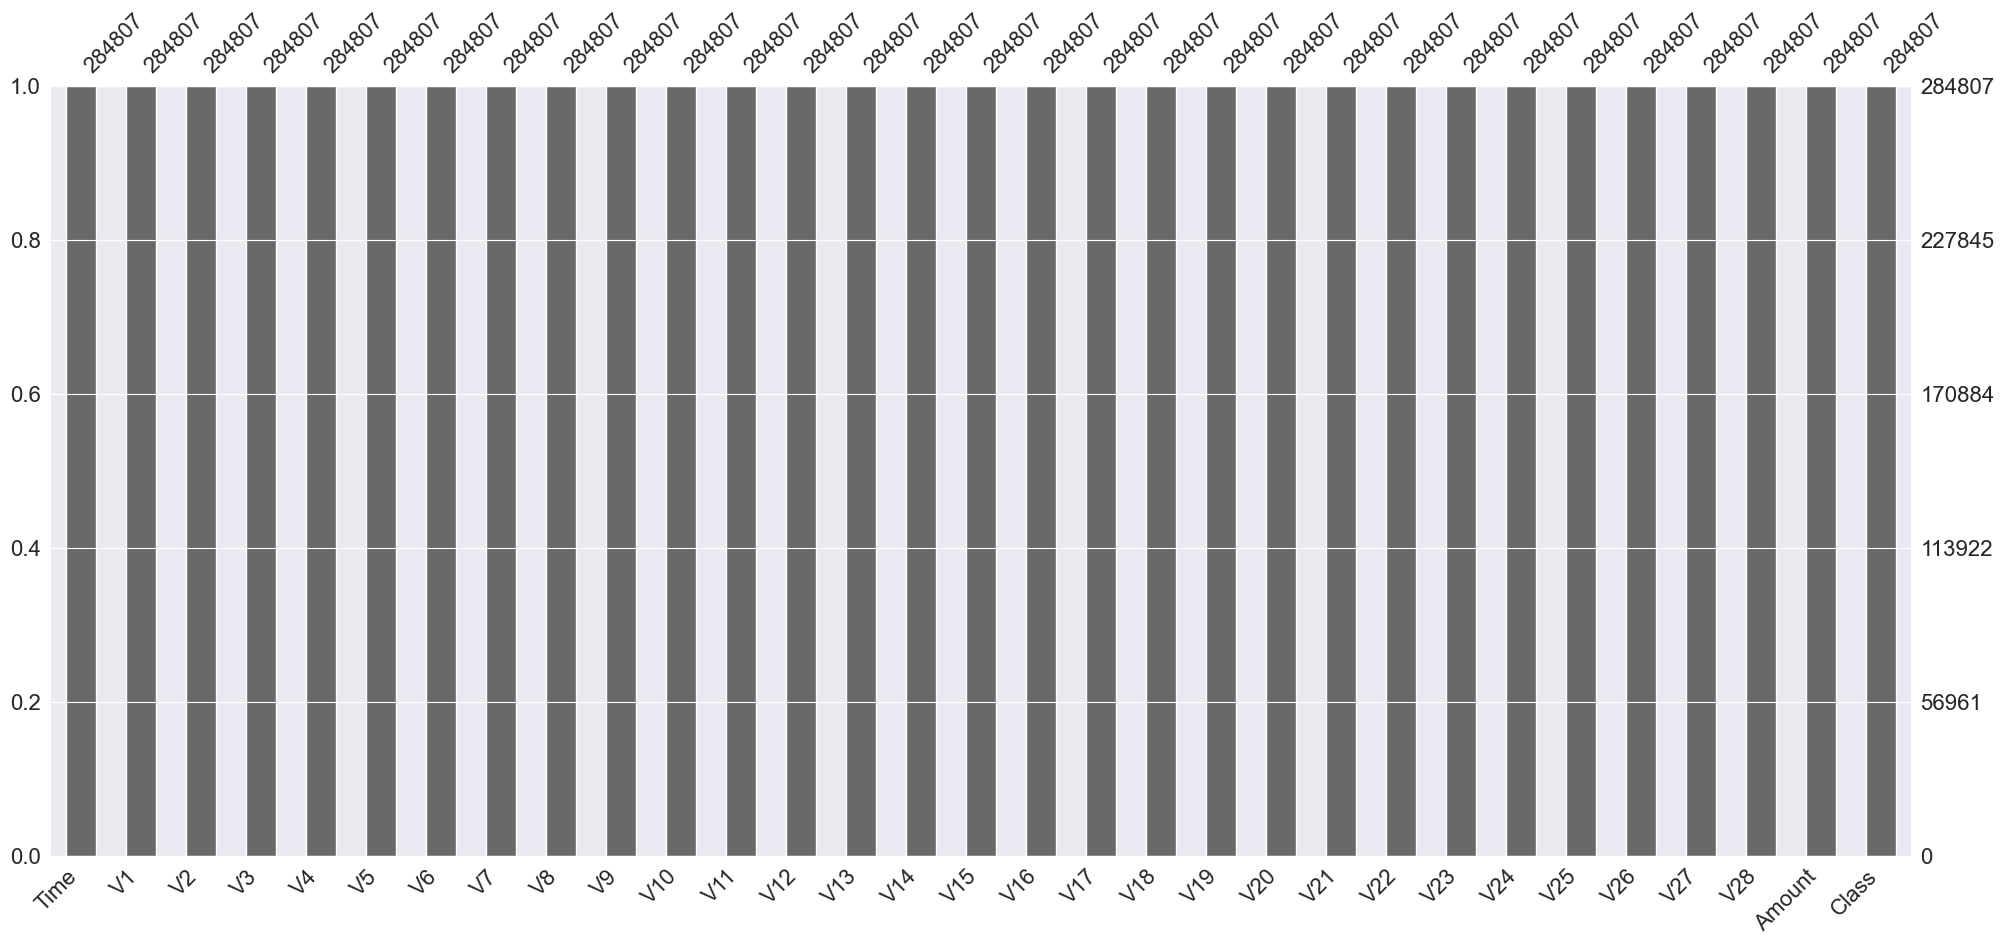

In [77]:
msno.bar(df)

Честные 99.83 % of the dataset
Мошеннические: 0.17 % of the dataset


<Axes: xlabel='Class', ylabel='count'>

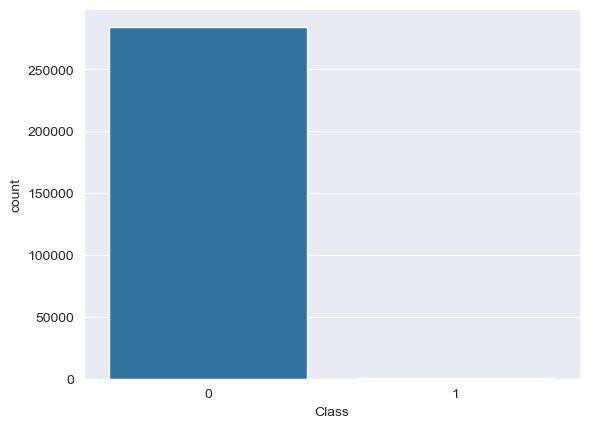

In [78]:
# Посмотрим, какой процент мошенничества в датасете
print('Честные', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Мошеннические:', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

sns.countplot(df, x='Class' )

<big>Data precessing</big>

In [79]:
# Т.к величина
from sklearn.preprocessing import StandardScaler


df['Amount'] = StandardScaler().fit_transform(np.array(df['Amount']).reshape(-1, 1))
df.drop(columns=["Time"], inplace=True)  # Удалим время, т.к эмпирически было выяснено, что с ним результаты хуже
# print(StandardScaler().fit_transform(np.array(df['Amount']).reshape(-1, 1)))
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [80]:
# Resampling датасета
fraud_index = np.array(df[df.Class == 1].index)
normal_index = np.array(df[df.Class == 0].index)

new_normal_index = choices(normal_index, k=len(fraud_index))
df = df.iloc[list(np.array(new_normal_index)) + list(np.array(fraud_index))]

In [81]:
# Разделяем датасет на X, y
X = df.iloc[:, df.columns != 'Class']
y = df.iloc[:, df.columns == 'Class']


In [82]:
# Перемешаем датасет
import sklearn.utils
df = sklearn.utils.shuffle(df)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
164832,2.044445,-0.073969,-1.374524,0.162186,0.192840,-0.719587,0.091450,-0.202191,0.376117,0.168260,...,0.295248,1.003337,-0.050916,-0.378412,0.261227,-0.094715,-0.016187,-0.071584,-0.349231,0
283179,1.979040,-0.196471,-0.945608,1.489517,0.094415,0.112659,-0.138758,0.043036,1.263039,0.013524,...,-0.372236,-0.760241,0.239441,0.415017,0.086971,-0.833754,0.027249,-0.040622,-0.309250,0
46109,-0.755463,0.495906,0.711217,-1.035203,0.861119,-0.340297,0.962012,-0.241006,-1.779256,0.154118,...,-0.692622,-1.642105,-0.221193,-1.108580,0.299439,-0.747135,-0.020120,0.084730,-0.149327,0
181452,-1.057912,0.296568,-0.653851,2.025816,0.931764,0.024824,0.760204,-0.347283,-0.369654,1.363594,...,-0.004357,0.628974,0.720263,0.697962,-1.299062,-0.600220,-0.366166,0.568841,-0.193386,0
124050,-2.162480,0.220057,1.674571,2.986615,0.972920,-0.540000,0.225892,0.325849,-1.834511,1.102082,...,-0.522691,-1.098133,1.314762,0.235845,0.179052,-0.187277,0.080939,-0.297183,-0.337277,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192687,1.522080,-0.519429,-2.581685,0.774741,0.206722,-1.431020,0.757011,-0.444418,0.997921,-1.429490,...,0.019649,-0.211678,-0.247452,-0.279472,0.239646,-0.508398,-0.015551,0.041881,0.750922,1
64329,-9.848776,7.365546,-12.898538,4.273323,-7.611991,-3.427045,-8.350808,6.863604,-2.387567,-6.065782,...,0.931958,-0.874467,-0.192639,-0.035426,0.538665,-0.263934,1.134095,0.225973,0.046539,1
154756,-2.092102,-1.964895,-1.800097,-1.523974,1.018891,-0.751273,3.474997,-0.786021,0.651051,-2.235030,...,0.639244,0.714535,1.094711,0.093503,1.348381,0.638036,-0.313148,0.145566,2.408569,0
18396,1.237174,-0.748334,0.139722,-0.698648,-1.012733,-0.839004,-0.419632,-0.118130,-1.051223,0.813011,...,0.300767,0.560592,-0.183772,0.360298,0.548470,-0.139763,-0.028982,0.011935,-0.006595,0


<Axes: xlabel='Class', ylabel='count'>

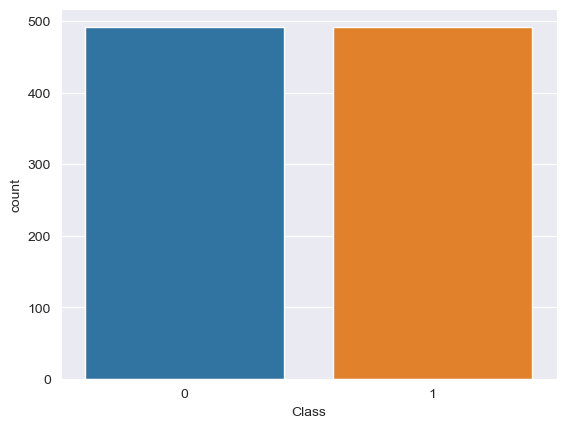

In [83]:
sns.countplot(df, x='Class' )

<big>Разделим датасет на тренировочную и тестовую выборки</big>

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

<big>Попробуем несколько разных классификаторов</big>

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score, classification_report

In [86]:
# Логистическая регрессия
lr = LogisticRegression()
lr.fit(X.values, y.values.ravel())
lr_pred = lr.predict(X_test.values)
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       150
           1       0.97      0.92      0.95       146

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



In [87]:
# Метод ближайших соседей
kNN = KNeighborsClassifier()
kNN.fit(X.values, y.values.ravel())
kNN_pred = kNN.predict(X_test.values)
print(classification_report(y_test, kNN_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       150
           1       0.98      0.91      0.94       146

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



In [88]:
# Метод опорных векторов
svc = SVC()
svc.fit(X.values, y.values.ravel())
svc_pred = svc.predict(X_test.values)
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       150
           1       0.98      0.89      0.93       146

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



In [89]:
# Решающее дерево
d_tree = DecisionTreeClassifier(
    random_state=0,
    )
d_tree.fit(X.values, y.values.ravel())
d_tree_pred = d_tree.predict(X_test.values)
print(classification_report(y_test, d_tree_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       146

    accuracy                           1.00       296
   macro avg       1.00      1.00      1.00       296
weighted avg       1.00      1.00      1.00       296



In [90]:
# Случайный лес
rf = RandomForestClassifier()
rf.fit(X.values, y.values.ravel())
rf_pred = rf.predict(X_test.values)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       146

    accuracy                           1.00       296
   macro avg       1.00      1.00      1.00       296
weighted avg       1.00      1.00      1.00       296



In [91]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print(classification_report(y_test, xgb_pred))


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       150
           1       0.95      0.90      0.92       146

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



In [92]:
print('Logistic Regression: ', roc_auc_score(y_test, lr_pred))
print('KNears Neighbors: ', roc_auc_score(y_test, kNN_pred))
print('Support Vector Classifier: ', roc_auc_score(y_test, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_test, d_tree_pred))
print('Random Forest Classifier: ', roc_auc_score(y_test, rf_pred))
print('XGB Classifier: ', roc_auc_score(y_test, xgb_pred))



Logistic Regression:  0.9489954337899543
KNears Neighbors:  0.9454794520547944
Support Vector Classifier:  0.9352054794520548
Decision Tree Classifier:  1.0
Random Forest Classifier:  1.0
XGB Classifier:  0.9252968036529681
